<a href="https://colab.research.google.com/github/watersavvy/NLP_Projects/blob/main/AK_DS_Unit_4_Sprint_Challenge_13_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint Challenge
## *Data Science Sprint 13*

After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge.

## Challenge Objectives
Successfully complete all these objectives to earn full credit.

**Successful completion is defined as passing all the unit tests in each objective.**  

There are 8 total possible points in this sprint challenge.


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu.

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).**
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy`
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline`
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#!pip install pyLDAvis==3.3.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import spacy
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.pipeline import Pipeline
import pyLDAvis as pyLDAvis
import pyLDAvis.gensim_models
from pyLDAvis import gensim_models


In [ ]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [ ]:
# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df

df = pd.read_json(data_url, lines=True)

#raise NotImplementedError()

In [ ]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

In [ ]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [ ]:
y = df['stars']

X = df['text']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(df[X_text_reviews], df[Y_text_reviews], test_size=0.2, random_state=42, shuffle=True)

In [ ]:
y_train.head()

9254    2
1561    5
1670    5
6087    5
6669    2
Name: stars, dtype: int64

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

**TO PASS CODEGRADE RUNTIME:**
- Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [ ]:
def clean_text(text):
    """
    Accepts a single text document and performs several regex substitutions in order to clean the document.

    Parameters
    ----------
    text: string or object

    Returns
    -------
    text: string or object
    """

    # order of operations - apply the expression from top to bottom
    date_regex = r"\d+/\d+/\d+"
    punct_regex = r"[^0-9a-zA-Z\s]" # any non-alphanumeric chars
    special_chars_regex = r"[\$\%\&\@+]"
    numerical_regex =  r"[0-9]"  # match one or more digits

    # Replace any strings matching the above regex patterns with blank strings
    # (effectively removing them from the text)
    text = re.sub(date_regex, "", text)
    text = re.sub(punct_regex, "", text)
    text = re.sub(special_chars_regex, "", text)
    text = re.sub(numerical_regex, "", text)

    # match one or more whitespace chars
    whitespace_regex = r"[\s]+"
    # replace one or more whitespace characters with a single white space char
    #    not a blank string!
    text = re.sub(whitespace_regex, " ", text)


    # apply case normalization
    # text = YOUR CODE HERE (added to return statement)
    return text.lower().lstrip().rstrip()

In [ ]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
df['cleaned_text'][0]

'beware fake fake fakewe also own a small business in los alamitos ca and received what looked like a legitimate bill for with an account number and all i called the phone number listed the wait time on hold said minutes and to leave a message i could not get a live person on the phone no matter what number i selected i left a very firm message that i would be contacting the bbb and my attorney regarding their company trying to scam businesses this has to be illegal'

In [ ]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [ ]:
def tokenize(doc):

  #pass text through Spacy language model

  tokens = []
  for token in nlp(doc):

    if (not token.is_stop) & (not token.is_punct) & (not token.is_space):
      tokens.append(token.lemma_)

  return tokens


#raise NotImplementedError()

In [ ]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [ ]:
%%time

vect = CountVectorizer(tokenizer=tokenize, stop_words='english')

#raise NotImplementedError()

CPU times: user 60 µs, sys: 1 µs, total: 61 µs
Wall time: 66.3 µs


In [ ]:
%%time

dtm = vect.fit_transform(df.cleaned_text)
#dtm = dtm.toarray
#dtm = dtm.reshape((10000, 25333))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 4min 7s, sys: 583 ms, total: 4min 7s
Wall time: 4min 12s


In [ ]:
vect.get_feature_names_out()

array(['aa', 'aaa', 'aaaahhhs', ..., 'zyrtec', 'zzaplon', 'zzzzzzzzz'],
      dtype=object)

In [ ]:
dtm_vect = pd.DataFrame(data=dtm.toarray(), columns=vect.get_feature_names_out())


In [ ]:
dtm_vect.head()

,aa,aaa,aaaahhhs,aaasssk,aab,aamco,aand,aaron,aas,ab,...,zuma,zumanity,zumba,zuni,zupas,zuzana,zuzu,zyrtec,zzaplon,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



2. Write a fake review. Assign the text of the review to an object called `fake_review`.
3. Query the fake review for the 10 most similar reviews, print the text of the reviews.
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [ ]:
# Create a fake review and find the 10 most similar reviews

fake_review="went in 30 minutes before closing that the manager Christina provided excellent customer service. I asked for a 20 piece and she had some more chicken made for me so i could get what i wanted. I have been in there other occasions when Christina wasn't there and i wasn't able to get what i needed. Normally when i go to most places the employee's are in a rush to get off work and don't want to make any more food and you end up either getting nothing or having to get something that you didn't want. Not this time."

# raise NotImplementedError()

In [ ]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

In [ ]:
fake_review_vector = vect.transform([fake_review])

In [ ]:
# Create and fit a NearestNeighbors model named "nn"

top_n_neigh = 10
nn = NearestNeighbors(n_neighbors=top_n_neigh)
nn.fit(dtm)

n_dist, n_ind = nn.kneighbors(fake_review_vector)

#raise NotImplementedError()

In [ ]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [ ]:
# 10 Reviews most similar to fake review

count=0
for most_sim_text in n_ind[:][0]:
  most_sim_review = df.iloc[most_sim_text]
  count+=1
  print("n", count," ",most_sim_text)


n 1   9898
n 2   4493
n 3   9465
n 4   6625
n 5   144
n 6   6204
n 7   2470
n 8   6252
n 9   6311
n 10   4546


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset.

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels).
    - Use that pipeline to predict a star rating for your fake review from Part 2.



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`.
    - Include 2 possible values for each parameter
        - **Keep the values for each parameter low. Extreme values will compromise runtime**
    - **Use `n_jobs` = 1**
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [ ]:
#!pip install lightgbm

In [ ]:
#!pip install dask distributed --upgrade

In [ ]:
#!pip install ipython

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00


In [ ]:
#Creating Pipeline Object with TfIdf

from sklearn.decomposition import TruncatedSVD
from lightgbm import LGBMClassifier

svd = TruncatedSVD(n_components=2,
                   algorithm='randomized',
                   n_iter=10)


#max_features=500
vect = TfidfVectorizer(stop_words='english', max_features=500)
clf = LGBMClassifier()

lsa = Pipeline([('vect', vect), ('svd', svd)])
pipe = Pipeline([('lsa', lsa), ('clf', clf)])

#raise NotImplementedError()

In [ ]:
# Parameters to search in dictionary
%%time
parameters = {
    'lsa__svd__n_components': ([50]),
    'lsa__vect__max_df': ([0.75]),
    'clf__max_depth':([20]),
    'clf__n_estimators': ([1500]),
    'clf__learning_rate': ([0.1]),
    'clf__num_leaves': ([50]),
    'clf__min_data_in_leaf': ([30])

}

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 14.3 µs


In [ ]:
  # Implement Grid Seearch with Cross Validation1)
  gs = GridSearchCV(pipe, parameters, cv=3, n_jobs=-1)
  gs.fit(X_train, y_train) #where does the X,y come from?

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('lsa',
                                        Pipeline(steps=[('vect',
                                                         TfidfVectorizer(max_features=500,
                                                                         stop_words='english')),
                                                        ('svd',
                                                         TruncatedSVD(n_iter=10))])),
                                       ('clf', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.1], 'clf__max_depth': [20],
                         'clf__min_data_in_leaf': [30],
                         'clf__n_estimators': [1500], 'clf__num_leaves': [50],
                         'lsa__svd__n_components': [50],
                         'lsa__vect__max_df': [0.75]},
             verbose=1)

In [ ]:
gs.best_params_

{'clf__learning_rate': 0.1,
 'clf__max_depth': 20,
 'clf__min_data_in_leaf': 30,
 'clf__n_estimators': 1500,
 'clf__num_leaves': 50,
 'lsa__svd__n_components': 50,
 'lsa__vect__max_df': 0.75}

In [ ]:
print(gs.best_score_)

0.5662493144846017


In [ ]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations.
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this:

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.**

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz).

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object.
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model.

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
df['lemmas'] = df['cleaned_text'].apply(tokenize)

In [ ]:
from gensim.models import LdaModel
from gensim import corpora
from gensim.corpora import Dictionary

# YO


#raise NotImplemented

id2word = corpora.Dictionary(df['lemmas'])
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

# YO
# Do not change this value
num_topics = 5

In [ ]:
# Running this renders the corpus and id2word?

lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics=num_topics,
               passes=5
               )
#raise NotImplementedError()

#### Testing

In [ ]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 2 visualizations of the results:
1. Create a visualization using pyLDAvis. Run the cell, then comment out your code before submission, leaving the visualization in the cell.

2. Create a visualization using the matplotlib library and utilizing the subplots function. Assign this visualization to a variable called `visual_plot`.


In [ ]:
#!pip install ipywidgets

In [ ]:
# Cell for pyLDAvis visualization

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(topic_model=lda, corpus=corpus, dictionary=id2word)
vis
#raise NotImplementedError()


/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.126093 -0.042678       1        1  31.539458
3     -0.119637 -0.159336       2        1  24.792976
4     -0.018657  0.119201       3        1  21.990301
1     -0.050103  0.132377       4        1  19.175401
2      0.314490 -0.049564       5        1   2.501864, topic_info=            Term         Freq        Total Category  logprob  loglift
137         food  4857.000000  4857.000000  Default  30.0000  30.0000
721          car   567.000000   567.000000  Default  29.0000  29.0000
98          room  1109.000000  1109.000000  Default  28.0000  28.0000
97    restaurant  1664.000000  1664.000000  Default  27.0000  27.0000
44       service  3634.000000  3634.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
44       service    63.147366  3634.498625   Topic5  -5.2696  -0.3646
1663      carpet    24.364667    61.228224   Topic5  -6.2219   2.7667
1636       suite    23.780873    71.854295   Topic5  -6.2462   2.5824
416       fridge    22.488876    55.128792   Topic5  -6.3020   2.7915
89           not    23.455344  7401.656293   Topic5  -6.2599  -2.0662

[411 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
4996       3  0.960215    agent
4996       4  0.029097    agent
9911       1  0.974095      ahi
10158      4  0.092754  airline
10158      5  0.881164  airline
...      ...       ...      ...
113        2  0.038833     year
113        3  0.226703     year
113        4  0.531072     year
113        5  0.001050     year
11518      2  0.977924      yuk

[825 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 2, 3])

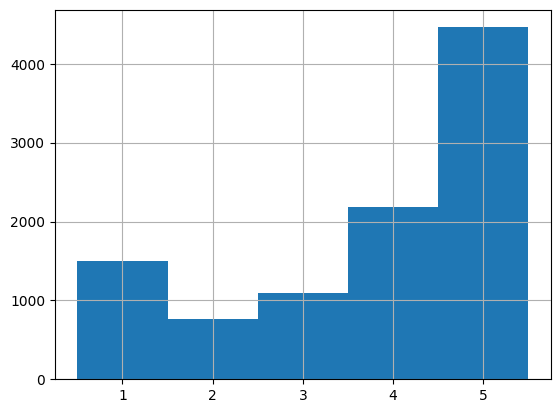

In [ ]:
# Cell for matplotlib visualzation
import matplotlib.pyplot as plt
import numpy as np

bin_edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
df['stars'].hist(bins=bin_edges);


#raise NotImplementedError()

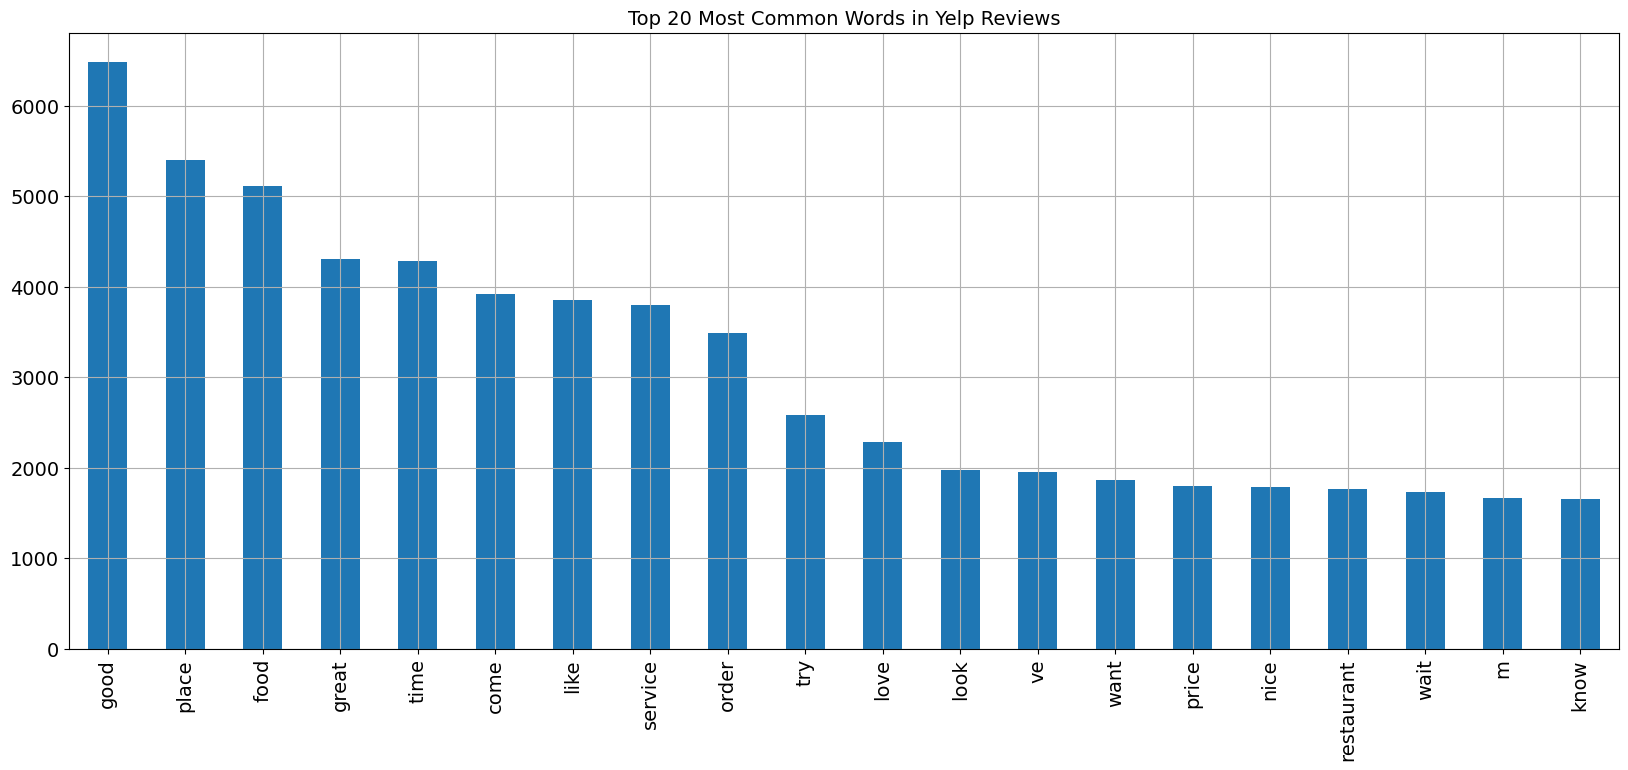

In [ ]:
# COMPLETE THE CODE IN THIS CELL
top_n = 20
# sum the term counts in each column of the dtm_vect data frame and then sort in descending order
visual_plot = dtm_vect.sum().sort_values(ascending=False)

plt.title("Top {} Most Common Words in Yelp Reviews".format(top_n), fontsize=14)
visual_plot = visual_plot[:top_n].plot(kind="bar", figsize=(20,8), grid=True, fontsize=14);



In [ ]:
# Visible Testing
assert visual_plot.__module__ == 'matplotlib.axes._subplots', "You must create and assign to visual_plot a visualization"


AssertionError: ignored

**SUMMARY OF THE TOPIC MODEL OF YELP REVIEWS**

Latent Dirichlet Allocation (LDA) was applied to the the cleaned text reviews to break the submissions up into five different groups or topics based on common word patterns within each group. Group 1 and 2 overlapped as did 3 and 4 however 5 was on it's own far across the graph.
*   Group 1 - restaurants that have a bar and bar menu
*   Group 2 - picked up on chicken
*   Group 3 - highly recommeneded, likely highest percentage of 5 stars
*   Group 4 - top word is "not" and second "good" so likely the lower star reviews
*   Group 5 - may have picked up some french, and could be hotel restaurants

Running pyLDAvis to break the Reviews into Topics provides a list of the most common word of each Topic Group additionally. In this case it was the top 30 words. We can also see the percentage of Tokens from the full Corpus of Reviews each Topic Group was allocated.
*   Group 1 - 31.5%
*   Group 2 - 24.8%
*   Group 3 - 22%
*   Group 4 - 19.2%
*   Group 5 - 2.5%

With more time, further clean up would include removing words with 2 or less characters with the REGEX function and running a Coherance Model.












